In [64]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Machine learning
from sklearn.preprocessing import StandardScaler



In [65]:
# Here we will load the data and display the first few rows
df = pd.read_csv('/Users/danielharrod/Company_Merger/Data/acquisitions_update_2021.csv')
df.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


In [66]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1455 non-null   int64 
 1   Parent Company     1455 non-null   object
 2   Acquisition Year   1455 non-null   object
 3   Acquisition Month  1455 non-null   object
 4   Acquired Company   1455 non-null   object
 5   Business           1455 non-null   object
 6   Country            1455 non-null   object
 7   Acquisition Price  1455 non-null   object
 8   Category           1455 non-null   object
 9   Derived Products   1455 non-null   object
dtypes: int64(1), object(9)
memory usage: 113.8+ KB


In [67]:
# Here we will display the number of missing values in each column, counting both null values and "-"
df.replace("-", np.nan).isnull().sum()

df.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


In [68]:
# Clean the data by converting "-" to NaN during initial load
df = df.replace("-", np.nan)

df.head()   

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
2,3,Apple,1988,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN
4,5,Apple,1989,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN


In [69]:
# Calculate percentage of missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("Missing Values (%):")
for column, percentage in missing_percentages.items():
    print(f"{column}: {percentage:.2f}%")

Missing Values (%):
ID: 0.00%
Parent Company: 0.00%
Acquisition Year: 1.92%
Acquisition Month: 3.99%
Acquired Company: 0.00%
Business: 18.83%
Country: 76.56%
Acquisition Price: 64.95%
Category: 99.31%
Derived Products: 72.30%


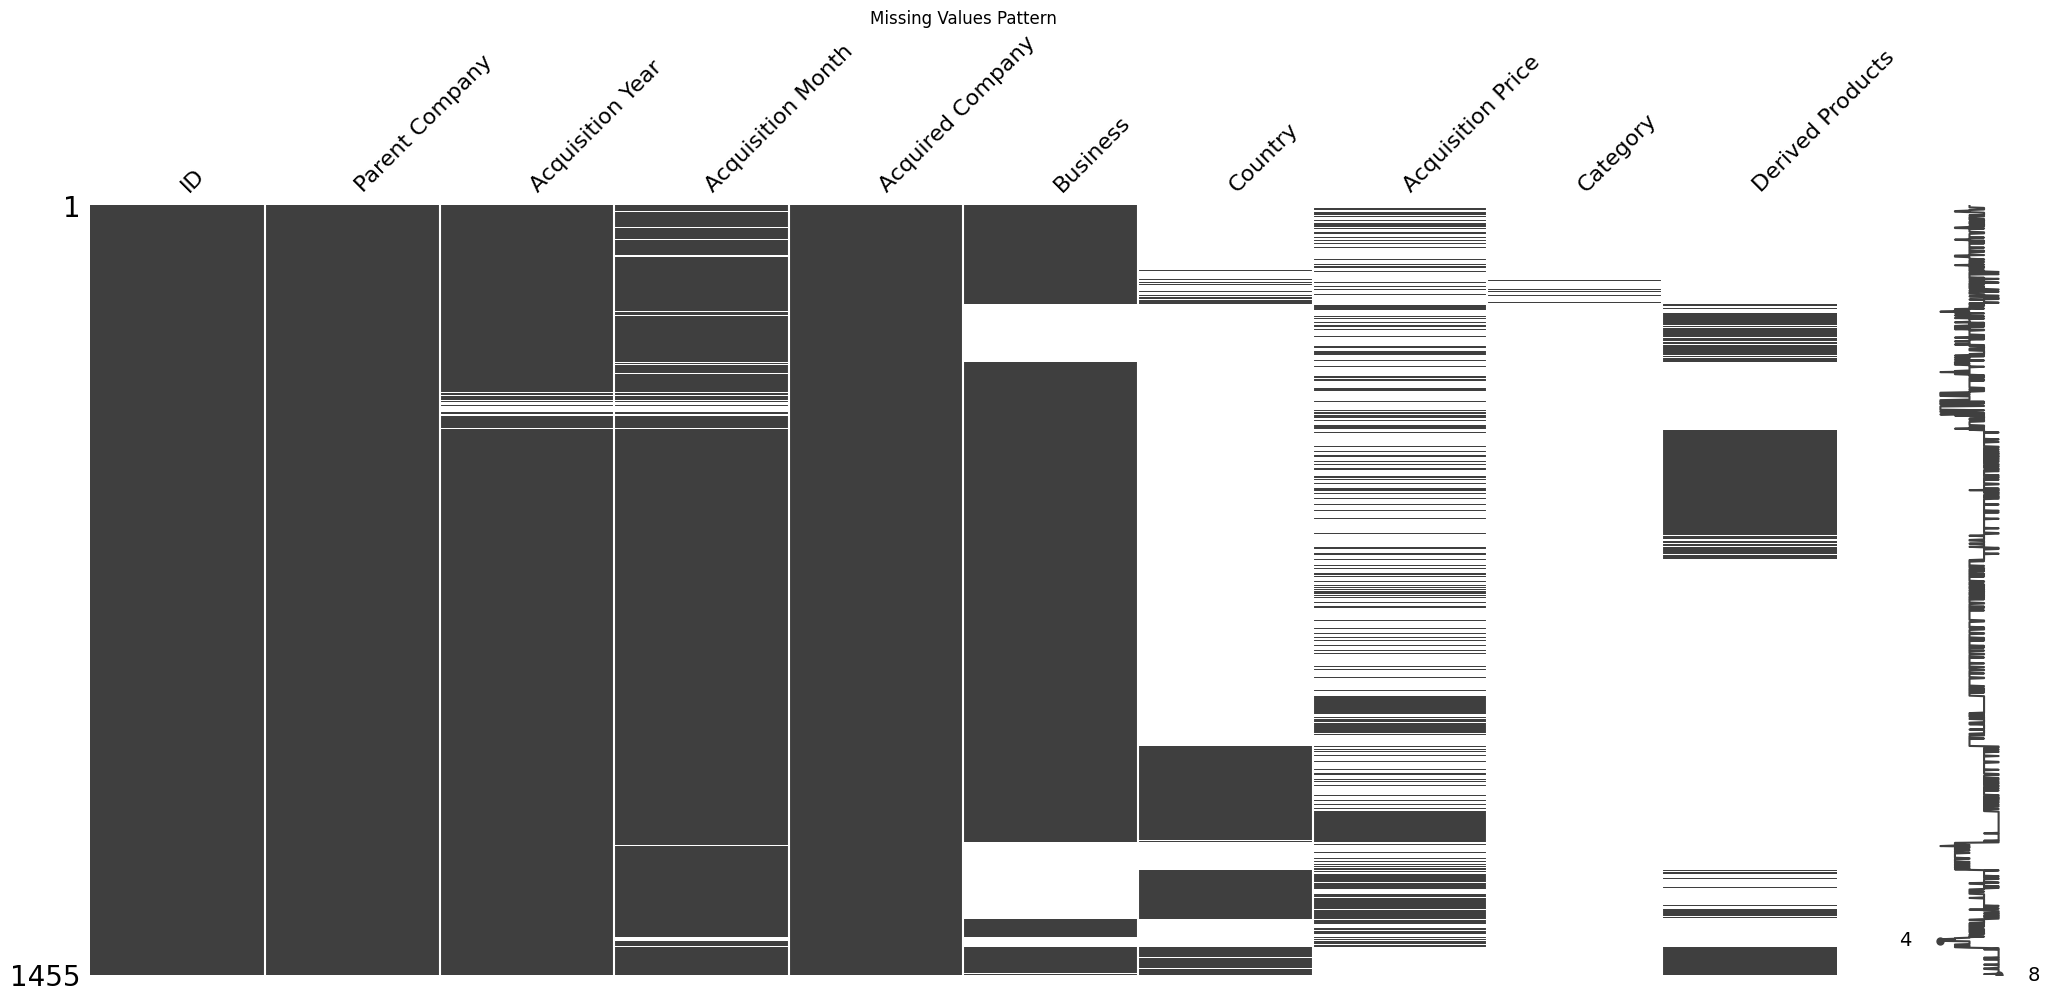

In [70]:
# 1. Create a visualization of missing values
import missingno as msno
msno.matrix(df)
plt.title('Missing Values Pattern')
plt.show()



# 2. For categorical columns, create "Unknown" category
for col in ['Business', 'Category', 'Derived Products']:
    df[col] = df[col].fillna('Unknown')

# 4. For Acquisition dates, fill missing values
df['Acquisition Year'] = df['Acquisition Year'].fillna(df['Acquisition Year'].mode()[0])
df['Acquisition Month'] = df['Acquisition Month'].fillna('Unknown')

In [72]:
# Drop the columns with too many missing values
df = df.drop(['Category', 'Country', 'Derived Products'], axis=1)

# Combine Year and Month into a single datetime column
# First ensure Acquisition Year is string type and pad month names to full names
month_map = {'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April', 
             'May': 'May', 'Jun': 'June', 'Jul': 'July', 'Aug': 'August', 
             'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'}
             
df['Acquisition Date'] = pd.to_datetime(df['Acquisition Year'].astype(str) + ' ' + 
                                      df['Acquisition Month'].map(month_map), format='%Y %B', errors='coerce')

# Since we have a combined date column, we can drop the original year and month columns
df = df.drop(['Acquisition Year', 'Acquisition Month'], axis=1)

# Check the results
df.head()

,ID,Parent Company,Acquired Company,Business,Acquisition Price,Acquisition Date
0,1,Apple,Network Innovations,Software,NaN,1988-03-01
1,2,Apple,Orion Network Systems,Computer Software,NaN,1988-06-01
2,3,Apple,Styleware,Computer software,NaN,1988-06-01
3,4,Apple,Nashoba Systems,Computer software,NaN,1988-07-01
4,5,Apple,Coral Software,Computer software,NaN,1989-01-01


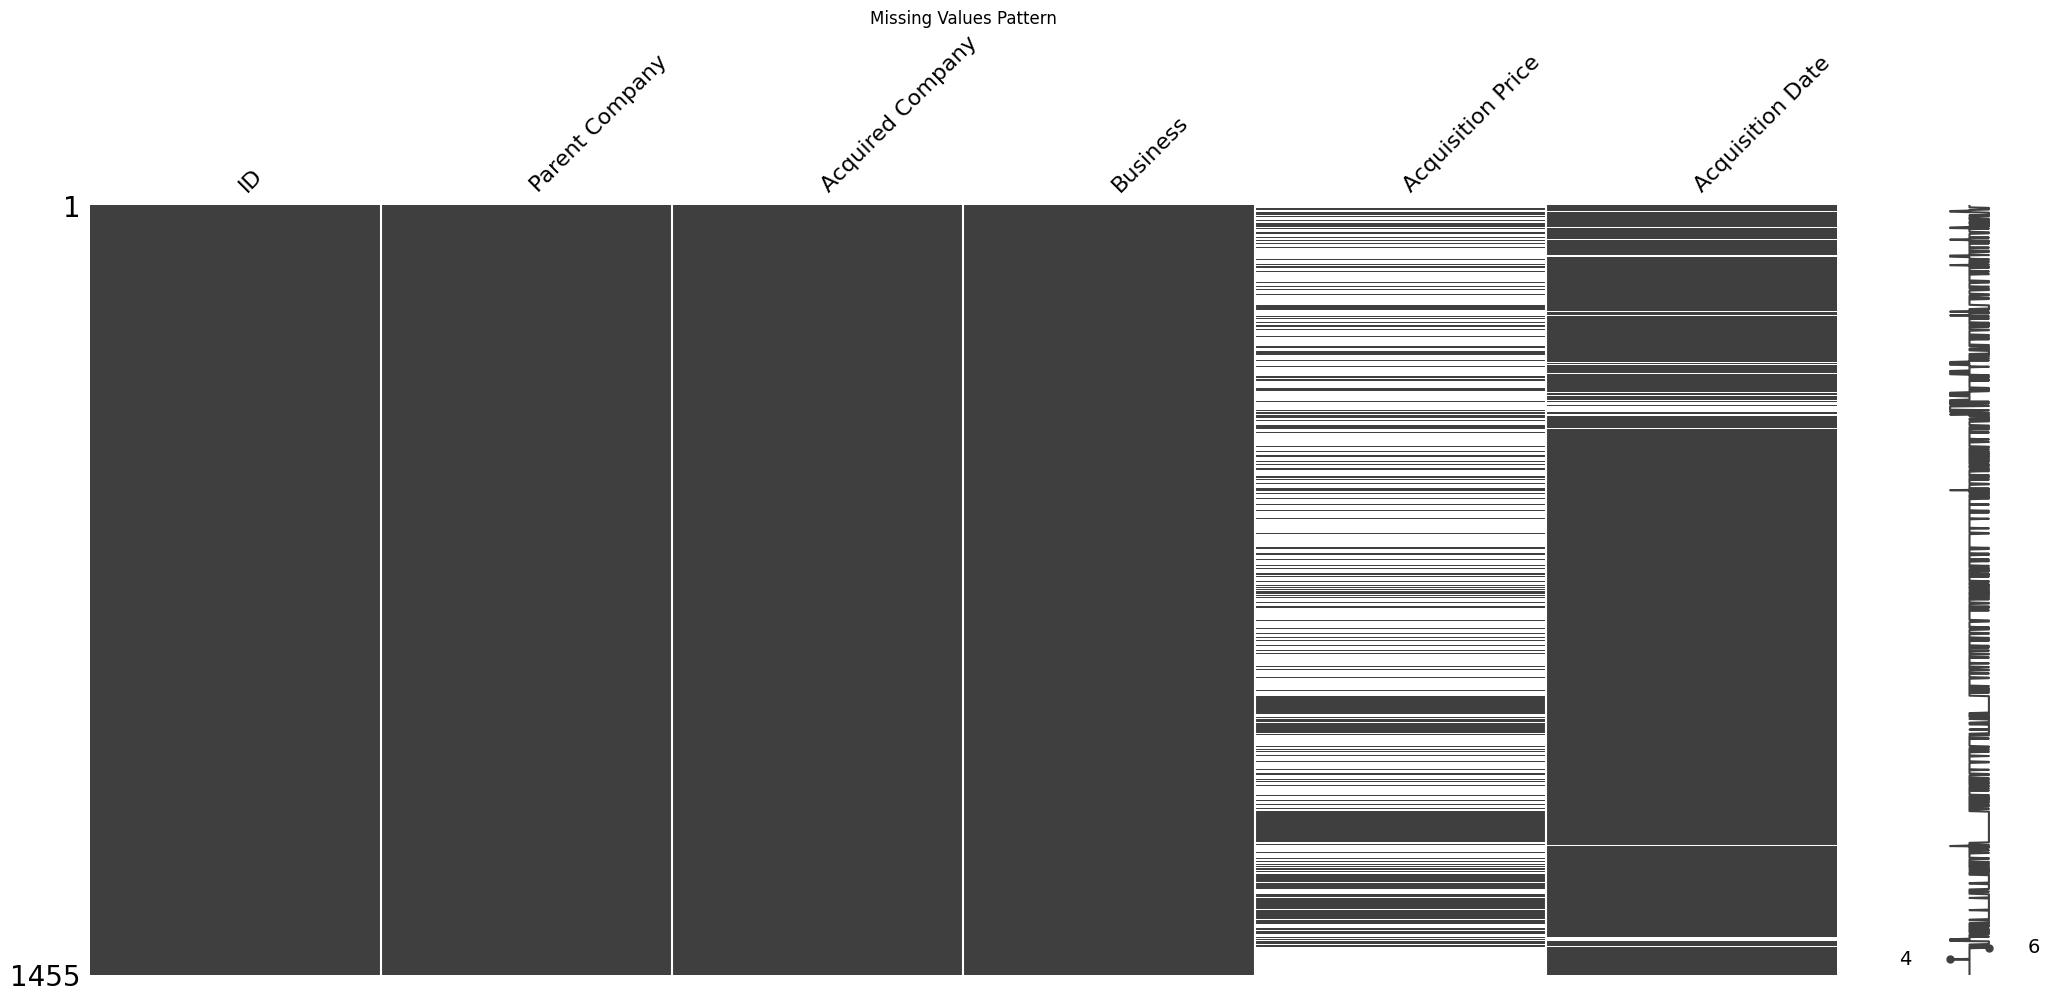

Missing Values (%):
ID: 0.00%
Parent Company: 0.00%
Acquired Company: 0.00%
Business: 0.00%
Acquisition Price: 64.95%
Acquisition Date: 3.99%


In [73]:
# 1. Create a visualization of missing values
import missingno as msno
msno.matrix(df)
plt.title('Missing Values Pattern')
plt.show()


# Calculate percentage of missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("Missing Values (%):")
for column, percentage in missing_percentages.items():
    print(f"{column}: {percentage:.2f}%")

In [74]:
# Lets drop the columns with more than 50% missing values
df = df.drop(['Acquisition Price'], axis=1)

df.head()

,ID,Parent Company,Acquired Company,Business,Acquisition Date
0,1,Apple,Network Innovations,Software,1988-03-01
1,2,Apple,Orion Network Systems,Computer Software,1988-06-01
2,3,Apple,Styleware,Computer software,1988-06-01
3,4,Apple,Nashoba Systems,Computer software,1988-07-01
4,5,Apple,Coral Software,Computer software,1989-01-01


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1455 non-null   int64         
 1   Parent Company    1455 non-null   object        
 2   Acquired Company  1455 non-null   object        
 3   Business          1455 non-null   object        
 4   Acquisition Date  1397 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 57.0+ KB


In [76]:
# Save the cleaned dataset to CSV
df.to_csv('/Users/danielharrod/Company_Merger/Data/acquisitions_cleaned.csv', index=False)
